<a href="https://colab.research.google.com/github/shortcipher3/stackoverflow/blob/master/compositing_images_by_blurred_mask_in_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://i.stack.imgur.com/O48QE.jpg
!wget https://i.stack.imgur.com/P7J0p.jpg
!wget https://i.stack.imgur.com/eovoO.jpg

--2020-06-09 03:24:38--  https://i.stack.imgur.com/O48QE.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.27.34, 104.16.3.35, 104.16.30.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.27.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27637 (27K) [image/jpeg]
Saving to: ‘O48QE.jpg.1’

O48QE.jpg.1         100%[===================>]  26.99K  --.-KB/s    in 0s      

2020-06-09 03:24:38 (105 MB/s) - ‘O48QE.jpg.1’ saved [27637/27637]

--2020-06-09 03:24:39--  https://i.stack.imgur.com/P7J0p.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.27.34, 104.16.3.35, 104.16.30.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.27.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21173 (21K) [image/jpeg]
Saving to: ‘P7J0p.jpg.1’

P7J0p.jpg.1         100%[===================>]  20.68K  --.-KB/s    in 0s      

2020-06-09 03:24:39 (96.8 MB/s) - ‘P7J0p.jpg.1’ saved [21173/21173]

--2020-

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# current code
def merge(lena, rocket, mask):
    '''Mask init and cropping'''
    #mask = np.zeros(lena.shape[:2], dtype='uint8')
    #cv2.fillConvexPoly(mask, circle, 255) # might be polygon
    '''Bitwise operations'''
    lena = cv2.bitwise_or(lena, lena, mask=mask)
    mask_inv = cv2.bitwise_not(mask) # mask inverting
    rocket = cv2.bitwise_or(rocket, rocket, mask=mask_inv)
    output = cv2.bitwise_or(rocket, lena)

    return output

In [0]:
lena = cv2.imread('O48QE.jpg')
rocket = cv2.imread('P7J0p.jpg')
mask = cv2.imread('eovoO.jpg', cv2.IMREAD_GRAYSCALE)

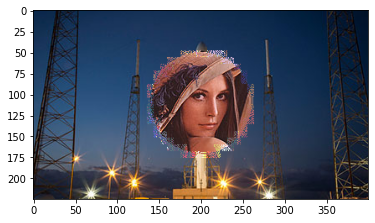

In [5]:
output1 = merge(lena, rocket, mask)

plt.imshow(output1[:, :, ::-1])

In [0]:
# current code
def blend_merge(lena, rocket, mask):
    mask = cv2.GaussianBlur(mask, (51, 51), 0)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    mask = mask.astype('float32') / 255
    foreground = cv2.multiply(lena, mask, dtype=cv2.CV_8U)
    background = cv2.multiply(rocket, (1 - mask), dtype=cv2.CV_8U)
    output = cv2.add(foreground, background)
    return output

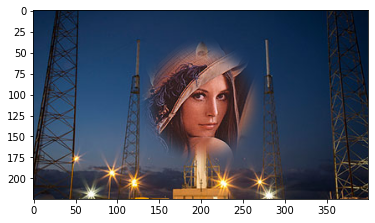

In [7]:
output2 = blend_merge(lena, rocket, mask)

plt.imshow(output2[:, :, ::-1])